## An introduction to the DataFrames.jl package and GLM

### The packages used in the tutorial

installed packages

In [1]:
using DataFrames        # core package
using CSV               # working with CSV files
using FreqTables        # frequency tables
using Plots, StatsPlots # plotting
using GLM               # regression models
using Distributions     # statistical distributions
using CategoricalArrays # handling categorical data

standard library

In [2]:
using Statistics

### Reading in a basic CSV file

We will work with data described and provided [here](https://archive.ics.uci.edu/ml/datasets/bank+marketing).

Our goal is to predict if the client will subscribe a term deposit (variable `"y"`).

In [3]:
bank = CSV.read("bank-additional-full.csv", DataFrame)

Row,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
,Int64,String15,String15,String31,String7,String7,String7,String15,String3,String3,Int64,Int64,Int64,Int64,String15,Float64,Float64,Float64,Float64,Float64,String3
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Some useful facts are that when displaying a data frame you get an information about its size on top and element types contained in its columns just under column names.

The CSV.jl package does autodetection of delimiters. Let us inspect the original file visually:

In [4]:
readlines("bank-additional-full.csv")

41189-element Vector{String}:
 "\"age\";\"job\";\"marital\";\"educatio" ⋯ 161 bytes ⋯ ";\"euribor3m\";\"nr.employed\";\"y\""
 "56;\"housemaid\";\"married\";\"basic" ⋯ 71 bytes ⋯ ".1;93.994;-36.4;4.857;5191;\"no\""
 "57;\"services\";\"married\";\"high.s" ⋯ 78 bytes ⋯ ".1;93.994;-36.4;4.857;5191;\"no\""
 "37;\"services\";\"married\";\"high.s" ⋯ 74 bytes ⋯ ".1;93.994;-36.4;4.857;5191;\"no\""
 "40;\"admin.\";\"married\";\"basic.6y" ⋯ 68 bytes ⋯ ".1;93.994;-36.4;4.857;5191;\"no\""
 "56;\"services\";\"married\";\"high.s" ⋯ 74 bytes ⋯ ".1;93.994;-36.4;4.857;5191;\"no\""
 "45;\"services\";\"married\";\"basic." ⋯ 75 bytes ⋯ ".1;93.994;-36.4;4.857;5191;\"no\""
 "59;\"admin.\";\"married\";\"professi" ⋯ 79 bytes ⋯ ".1;93.994;-36.4;4.857;5191;\"no\""
 "41;\"blue-collar\";\"married\";\"unk" ⋯ 77 bytes ⋯ ".1;93.994;-36.4;4.857;5191;\"no\""
 "24;\"technician\";\"single\";\"profe" ⋯ 83 bytes ⋯ ".1;93.994;-36.4;4.857;5191;\"no\""
 "25;\"services\";\"single\";\"high.sc" ⋯ 72 bytes ⋯ ".1;93.994;-36.4;4.85

### Your first steps with `DataFrame`

Jou can get a list of names in a data frame as strings using the `names` function.

In [5]:
names(bank)

21-element Vector{String}:
 "age"
 "job"
 "marital"
 "education"
 "default"
 "housing"
 "loan"
 "contact"
 "month"
 "day_of_week"
 "duration"
 "campaign"
 "pdays"
 "previous"
 "poutcome"
 "emp.var.rate"
 "cons.price.idx"
 "cons.conf.idx"
 "euribor3m"
 "nr.employed"
 "y"

Let us extract some columns:

In [6]:
bank.age

41188-element Vector{Int64}:
 56
 57
 37
 40
 56
 45
 59
 41
 24
 25
 41
 25
 29
  ⋮
 38
 57
 62
 64
 36
 37
 29
 73
 46
 56
 44
 74

In [7]:
bank[:, "age"]

41188-element Vector{Int64}:
 56
 57
 37
 40
 56
 45
 59
 41
 24
 25
 41
 25
 29
  ⋮
 38
 57
 62
 64
 36
 37
 29
 73
 46
 56
 44
 74

What is column name is non standard?

In [8]:
bank.cons.conf.idx

LoadError: ArgumentError: column name :cons not found in the data frame

In [9]:
bank."cons.conf.idx"

41188-element Vector{Float64}:
 -36.4
 -36.4
 -36.4
 -36.4
 -36.4
 -36.4
 -36.4
 -36.4
 -36.4
 -36.4
 -36.4
 -36.4
 -36.4
   ⋮
 -50.8
 -50.8
 -50.8
 -50.8
 -50.8
 -50.8
 -50.8
 -50.8
 -50.8
 -50.8
 -50.8
 -50.8

In [10]:
bank[:, "cons.conf.idx"]

41188-element Vector{Float64}:
 -36.4
 -36.4
 -36.4
 -36.4
 -36.4
 -36.4
 -36.4
 -36.4
 -36.4
 -36.4
 -36.4
 -36.4
 -36.4
   ⋮
 -50.8
 -50.8
 -50.8
 -50.8
 -50.8
 -50.8
 -50.8
 -50.8
 -50.8
 -50.8
 -50.8
 -50.8

Our data frame looks a bit wide. Let us keep only relevant cokumns in it.

In [11]:
bank2 = select(bank, "y", "age", "campaign", "pdays")

Row,y,age,campaign,pdays
,String3,Int64,Int64,Int64
1,no,56,1,999
2,no,57,1,999
3,no,37,1,999
4,no,40,1,999
5,no,56,1,999
6,no,45,1,999
7,no,59,1,999
8,no,41,1,999
9,no,24,1,999


In [12]:
bank2 = select(bank, ["y", "age", "campaign", "pdays"])

Row,y,age,campaign,pdays
,String3,Int64,Int64,Int64
1,no,56,1,999
2,no,57,1,999
3,no,37,1,999
4,no,40,1,999
5,no,56,1,999
6,no,45,1,999
7,no,59,1,999
8,no,41,1,999
9,no,24,1,999


You can also use rules to select columns. For example, pick the columns that start with `"cons"`

In [13]:
select(bank, Cols(startswith("cons")))

Row,cons.price.idx,cons.conf.idx
,Float64,Float64
1,93.994,-36.4
2,93.994,-36.4
3,93.994,-36.4
4,93.994,-36.4
5,93.994,-36.4
6,93.994,-36.4
7,93.994,-36.4
8,93.994,-36.4
9,93.994,-36.4


In [14]:
select(bank, r"^cons", "pdays")

Row,cons.price.idx,cons.conf.idx,pdays
,Float64,Float64,Int64
1,93.994,-36.4,999
2,93.994,-36.4,999
3,93.994,-36.4,999
4,93.994,-36.4,999
5,93.994,-36.4,999
6,93.994,-36.4,999
7,93.994,-36.4,999
8,93.994,-36.4,999
9,93.994,-36.4,999


Available column selectors:
* single column or list of columns
* `Not`: keep all except the listed columns
* `Between`: keep all columns between the given columns
* `Cols`: complex column selection rules (including function)

> Exercises:
> 1. extract column `"nr.employed"`
> 2. get all columns that contain either `.` or `_` in their name
> 3. drop `"y"` column
> 4. move `"y"` column to the front

Going back to `bank2` data frame we notice that there is some strange `999` value in the last column. Let us investigate this.

In [15]:
bank2

Row,y,age,campaign,pdays
,String3,Int64,Int64,Int64
1,no,56,1,999
2,no,57,1,999
3,no,37,1,999
4,no,40,1,999
5,no,56,1,999
6,no,45,1,999
7,no,59,1,999
8,no,41,1,999
9,no,24,1,999


In [16]:
describe(bank2)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,y,,no,,yes,0,String3
2,age,40.0241,17,38.0,98,0,Int64
3,campaign,2.56759,1,2.0,56,0,Int64
4,pdays,962.475,0,999.0,999,0,Int64


In [17]:
describe(bank2, :all)

Row,variable,mean,std,min,q25,median,q75,max,sum,nunique,nuniqueall,nmissing,nnonmissing,first,last,eltype
,Symbol,Union…,Union…,Any,Union…,Union…,Union…,Any,Union…,Union…,Int64,Int64,Int64,Any,Any,DataType
1,y,,,no,,,,yes,,2,2,0,41188,no,no,String3
2,age,40.0241,10.4212,17,32.0,38.0,47.0,98,1648511,,78,0,41188,56,74,Int64
3,campaign,2.56759,2.77001,1,1.0,2.0,3.0,56,105754,,42,0,41188,1,3,Int64
4,pdays,962.475,186.911,0,999.0,999.0,999.0,999,39642439,,27,0,41188,999,999,Int64


(notice that the result is also a `DataFrame`, so you can work with it programatically in the future if you want)

We can inspect the contents of the column in more detail using a FreqTables.jl package

In [18]:
freqtable(bank2, "pdays")

27-element Named Vector{Int64}
pdays  │ 
───────┼──────
0      │    15
1      │    26
2      │    61
3      │   439
4      │   118
5      │    46
6      │   412
7      │    60
8      │    18
9      │    64
10     │    52
⋮            ⋮
16     │    11
17     │     8
18     │     7
19     │     3
20     │     1
21     │     2
22     │     3
25     │     1
26     │     1
27     │     1
999    │ 39673

In [19]:
proptable(bank2, "pdays")

27-element Named Vector{Float64}
pdays  │ 
───────┼────────────
0      │ 0.000364184
1      │ 0.000631252
2      │  0.00148101
3      │   0.0106584
4      │  0.00286491
5      │  0.00111683
6      │   0.0100029
7      │  0.00145673
8      │  0.00043702
9      │  0.00155385
10     │   0.0012625
⋮                  ⋮
16     │ 0.000267068
17     │ 0.000194231
18     │ 0.000169952
19     │  7.28367e-5
20     │  2.42789e-5
21     │  4.85578e-5
22     │  7.28367e-5
25     │  2.42789e-5
26     │  2.42789e-5
27     │  2.42789e-5
999    │    0.963217

Alternatively we could have used split-apply-combine strategy to get a similar result:

In [20]:
combine(groupby(bank2, :pdays, sort=true), nrow, proprow)

Row,pdays,nrow,proprow
,Int64,Int64,Float64
1,0,15,0.000364184
2,1,26,0.000631252
3,2,61,0.00148101
4,3,439,0.0106584
5,4,118,0.00286491
6,5,46,0.00111683
7,6,412,0.0100029
8,7,60,0.00145673
9,8,18,0.00043702


It turns out that `999` means that the client was never contacted by a bank before

Assume we want to work only with customers who were contacted previously. We can subset `bank2` data frame.

In [21]:
bank3 = subset(bank2, :pdays => x -> x .!= 999)

Row,y,age,campaign,pdays
,String3,Int64,Int64,Int64
1,no,37,1,6
2,no,48,1,4
3,no,42,1,4
4,no,50,1,3
5,no,36,2,4
6,yes,32,2,5
7,no,31,1,5
8,no,51,2,1
9,no,52,1,6


Here are some other options that do the same:

In [22]:
subset(bank2, :pdays => ByRow(!=(999)))

Row,y,age,campaign,pdays
,String3,Int64,Int64,Int64
1,no,37,1,6
2,no,48,1,4
3,no,42,1,4
4,no,50,1,3
5,no,36,2,4
6,yes,32,2,5
7,no,31,1,5
8,no,51,2,1
9,no,52,1,6


In [23]:
bank2[bank2.pdays .!= 999, :]

Row,y,age,campaign,pdays
,String3,Int64,Int64,Int64
1,no,37,1,6
2,no,48,1,4
3,no,42,1,4
4,no,50,1,3
5,no,36,2,4
6,yes,32,2,5
7,no,31,1,5
8,no,51,2,1
9,no,52,1,6


In [24]:
bank2[Not(bank2.pdays .== 999), :]

Row,y,age,campaign,pdays
,String3,Int64,Int64,Int64
1,no,37,1,6
2,no,48,1,4
3,no,42,1,4
4,no,50,1,3
5,no,36,2,4
6,yes,32,2,5
7,no,31,1,5
8,no,51,2,1
9,no,52,1,6


In [25]:
describe(bank3, mean => "mean", var => "var")

Row,variable,mean,var
,Symbol,Union…,Union…
1,y,,
2,age,41.8528,233.971
3,campaign,1.82244,1.54111
4,pdays,6.01452,14.6299


What is the distribution of `"age"`?

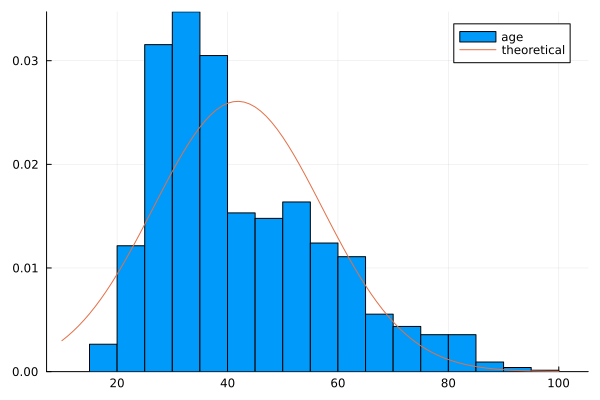

In [26]:
histogram(bank3.age; label="age", normalize=true)
m = mean(bank3.age)
s = std(bank3.age)
plot!(10:100, pdf(Normal(m, s), 10:100); label="theoretical")


What is the distribution of `"campaign"` - "number of contacts performed during this campaign")?

In [27]:
prop_campaign = combine(groupby(bank3, "campaign"), proprow)

Row,campaign,proprow
,Int64,Float64
1,1,0.526073
2,2,0.292409
3,3,0.10363
4,4,0.0349835
5,5,0.0184818
6,6,0.0132013
7,7,0.00594059
8,8,0.0039604
9,11,0.000660066


In [28]:
λ = mean(bank3.campaign) - 1.0 # note that the first contact is certain
prop_campaign.poisson = [pdf(Poisson(λ), k-1) for k in prop_campaign.campaign]
prop_campaign

Row,campaign,proprow,poisson
,Int64,Float64,Float64
1,1,0.526073,0.439357
2,2,0.292409,0.361346
3,3,0.10363,0.148593
4,4,0.0349835,0.0407364
5,5,0.0184818,0.00837584
6,6,0.0132013,0.00137773
7,7,0.00594059,0.00018885
8,8,0.0039604,2.21884e-5
9,11,0.000660066,1.71439e-8


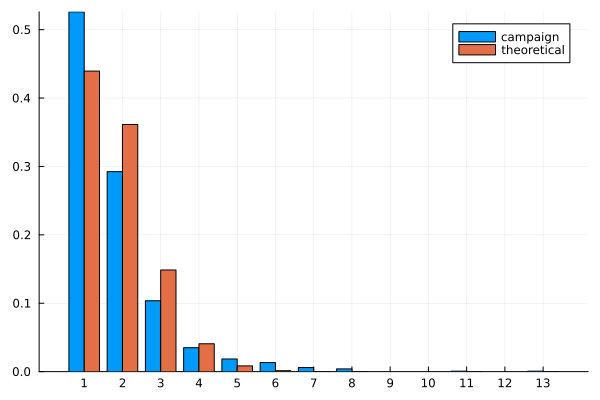

In [29]:
groupedbar(prop_campaign.campaign, [prop_campaign.proprow prop_campaign.poisson];
           xticks=1:13, bar_width=0.8, labels=["campaign" "theoretical"])

One might ask if the variables are correlated with `"y"` in `bank3` data frame. It is easy to check.

Recode variable `y` to be binary. Let us first make sure that it is binary indeed.

In [30]:
combine(groupby(bank3, "y"), nrow)

Row,y,nrow
,String3,Int64
1,no,548
2,yes,967


OK - it is safe to recode it.

In [31]:
bank3.y_bin = bank3.y .== "yes"

1515-element BitVector:
 0
 0
 0
 0
 0
 1
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 1
 1
 1
 1
 0
 1
 1
 1
 1
 0

Always double check if you got what you wanted.

In [32]:
freqtable(bank3, "y", "y_bin")

2×2 Named Matrix{Int64}
y ╲ y_bin │ false   true
──────────┼─────────────
no        │   548      0
yes       │     0    967

In [33]:
combine(groupby(bank3, "y"), ["age", "campaign", "pdays"] .=> mean)

Row,y,age_mean,campaign_mean,pdays_mean
,String3,Float64,Float64,Float64
1,no,40.4252,2.0292,6.19343
2,yes,42.6618,1.70527,5.91313


In [34]:
combine(bank3, ["age", "campaign", "pdays"] .=> (x -> cor(x, bank3.y_bin)) .=> x -> x * "_cor")

Row,age_cor,campaign_cor,pdays_cor
,Float64,Float64,Float64
1,0.0702834,-0.125418,-0.0352235


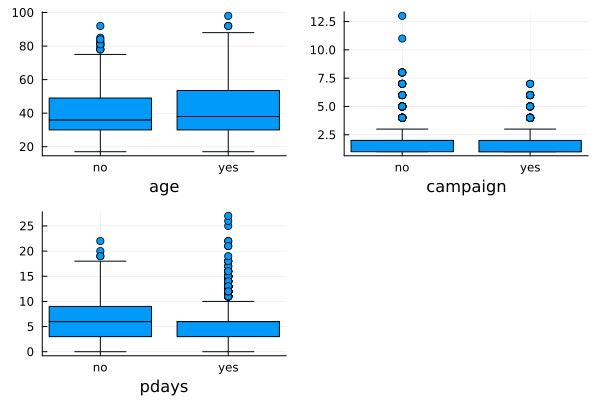

In [35]:
plot(groupedboxplot(bank3.y, bank3.age; xlabel="age", label=nothing),
     groupedboxplot(bank3.y, bank3.campaign; xlabel="campaign", label=nothing),
     groupedboxplot(bank3.y, bank3.pdays; xlabel="pdays", label=nothing))

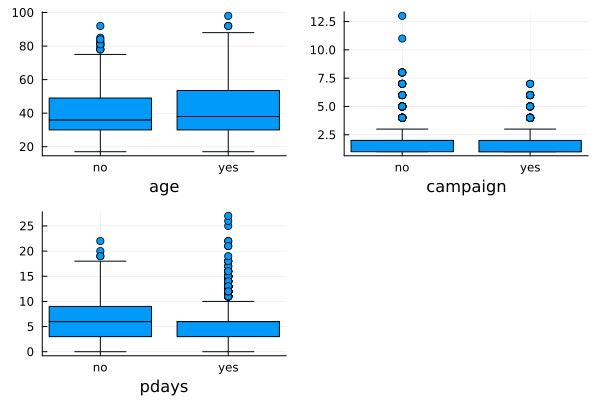

In [36]:
plot([groupedboxplot(bank3.y, bank3[:, col]; xlabel=col, label=nothing)
      for col in ["age", "campaign", "pdays"]]...)

## Handling missing data

Let us go back to our `bank2` data frame.

In [37]:
bank2

Row,y,age,campaign,pdays
,String3,Int64,Int64,Int64
1,no,56,1,999
2,no,57,1,999
3,no,37,1,999
4,no,40,1,999
5,no,56,1,999
6,no,45,1,999
7,no,59,1,999
8,no,41,1,999
9,no,24,1,999


We know that if `"pdays"` is `999` then it is a missing value. We can perform the conversion in several ways.

In [38]:
bank2.pdays2 = replace(bank2.pdays, 999=>missing)

41188-element Vector{Union{Missing, Int64}}:
  missing
  missing
  missing
  missing
  missing
  missing
  missing
  missing
  missing
  missing
  missing
  missing
  missing
 ⋮
  missing
  missing
 6
  missing
  missing
  missing
 9
  missing
  missing
  missing
  missing
  missing

Remember that `missing` usses three valued logic. The `isequal` and `isless` functions do not pass missing, other standard operators return missing if they encounter missing.

In [39]:
1 < missing

missing

In [40]:
isless(1, missing)

true

In [41]:
isless(Inf, missing)

true

by the way, it is good to remember that `missing` is larger than any real value in `isless` comparison.

Let us see another example to see that it matters.

In [42]:
subset(bank2, "pdays2" => x -> x .== 1, skipmissing=true)

Row,y,age,campaign,pdays,pdays2
,String3,Int64,Int64,Int64,Int64?
1,no,51,2,1,1
2,no,50,3,1,1
3,no,26,1,1,1
4,no,34,1,1,1
5,no,37,2,1,1
6,no,45,1,1,1
7,no,48,2,1,1
8,no,27,1,1,1
9,yes,32,4,1,1


or

In [43]:
subset(bank2, "pdays2" => ByRow(isequal(1)))

Row,y,age,campaign,pdays,pdays2
,String3,Int64,Int64,Int64,Int64?
1,no,51,2,1,1
2,no,50,3,1,1
3,no,26,1,1,1
4,no,34,1,1,1
5,no,37,2,1,1
6,no,45,1,1,1
7,no,48,2,1,1
8,no,27,1,1,1
9,yes,32,4,1,1


In [44]:
describe(bank2)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,y,,no,,yes,0,String3
2,age,40.0241,17,38.0,98,0,Int64
3,campaign,2.56759,1,2.0,56,0,Int64
4,pdays,962.475,0,999.0,999,0,Int64
5,pdays2,6.01452,0,6.0,27,39673,"Union{Missing, Int64}"


You have to change the type of the vector using the `allowmissing!` function.

In [45]:
allowmissing!(bank2, "pdays")

Row,y,age,campaign,pdays,pdays2
,String3,Int64,Int64,Int64?,Int64?
1,no,56,1,999,missing
2,no,57,1,999,missing
3,no,37,1,999,missing
4,no,40,1,999,missing
5,no,56,1,999,missing
6,no,45,1,999,missing
7,no,59,1,999,missing
8,no,41,1,999,missing
9,no,24,1,999,missing


Now you can assign `missing` to `"pdays"` column.

In [46]:
replace!(bank2.pdays, 999=>missing)

41188-element Vector{Union{Missing, Int64}}:
  missing
  missing
  missing
  missing
  missing
  missing
  missing
  missing
  missing
  missing
  missing
  missing
  missing
 ⋮
  missing
  missing
 6
  missing
  missing
  missing
 9
  missing
  missing
  missing
  missing
  missing

In [47]:
describe(bank2)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,y,,no,,yes,0,String3
2,age,40.0241,17,38.0,98,0,Int64
3,campaign,2.56759,1,2.0,56,0,Int64
4,pdays,6.01452,0,6.0,27,39673,"Union{Missing, Int64}"
5,pdays2,6.01452,0,6.0,27,39673,"Union{Missing, Int64}"


Often we want to get rid of missing data from a data frame. We can do this using the `dropmissing` function.

In [48]:
bank4 = dropmissing(bank2)

Row,y,age,campaign,pdays,pdays2
,String3,Int64,Int64,Int64,Int64
1,no,37,1,6,6
2,no,48,1,4,4
3,no,42,1,4,4
4,no,50,1,3,3
5,no,36,2,4,4
6,yes,32,2,5,5
7,no,31,1,5,5
8,no,51,2,1,1
9,no,52,1,6,6


Note that now columns automatically disallow missing values.

## Categorical variables

Sometimes you want to add to your columns the metadata that they are categorical.

In this section we discuss how you can do it and how this information is used by the `GLM` package as an application example.

Let us get back to our original `bank` data frame. We will want to build a model explaining `:y` using some other variables from the data set.

In [49]:
bank

Row,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
,Int64,String15,String15,String31,String7,String7,String7,String15,String3,String3,Int64,Int64,Int64,Int64,String15,Float64,Float64,Float64,Float64,Float64,String3
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


To estimate the model with `GLM` package needs to know that `:y` is binary. Let us change this.

In [50]:
bank.y_bin = ifelse.(bank.y .== "yes", 1, 0)

41188-element Vector{Int64}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 1
 0
 0
 1
 0
 1
 0
 0
 1
 0

In [51]:
bank

Row,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_bin
,Int64,String15,String15,String31,String7,String7,String7,String15,String3,String3,Int64,Int64,Int64,Int64,String15,Float64,Float64,Float64,Float64,Float64,String3,Int64
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
5,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
6,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
7,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
8,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
9,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [52]:
glm(@formula(y_bin ~ age + day_of_week + campaign), bank, Binomial())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, LogitLink}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y_bin ~ 1 + age + day_of_week + campaign

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────
                        Coef.  Std. Error       z  Pr(>|z|)    Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────────────
(Intercept)       -2.18369     0.0727297   -30.02    <1e-99  -2.32624     -2.04114
age                0.00916394  0.0014537     6.30    <1e-09   0.00631475   0.0120131
day_of_week: mon  -0.0986672   0.0514918    -1.92    0.0553  -0.199589     0.00225484
day_of_week: thu   0.115643    0.0493282     2.34    0.0191   0.018961     0.212324
day_of_week: tue   0.0670772   0.0503273     1.33    0.1826  -0.0315626    0.165717
day_of_week: wed   0.0672455 

This is not very nice as `day_of_week` is not properly ordered. Fortunately it is easy to change this.

In [53]:
bank.day_of_week = categorical(bank.day_of_week)

41188-element CategoricalArray{String3,1,UInt32}:
 String3("mon")
 String3("mon")
 String3("mon")
 String3("mon")
 String3("mon")
 String3("mon")
 String3("mon")
 String3("mon")
 String3("mon")
 String3("mon")
 String3("mon")
 String3("mon")
 String3("mon")
 ⋮
 String3("thu")
 String3("thu")
 String3("thu")
 String3("fri")
 String3("fri")
 String3("fri")
 String3("fri")
 String3("fri")
 String3("fri")
 String3("fri")
 String3("fri")
 String3("fri")

In [54]:
levels(bank.day_of_week)

5-element Vector{String3}:
 "fri"
 "mon"
 "thu"
 "tue"
 "wed"

In [55]:
levels!(bank.day_of_week, ["mon", "tue", "wed", "thu", "fri"]);

Now the order of levels should be correct.

In [56]:
glm(@formula(y_bin ~ age + day_of_week + campaign), bank, Binomial())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, LogitLink}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y_bin ~ 1 + age + day_of_week + campaign

Coefficients:
────────────────────────────────────────────────────────────────────────────────────
                        Coef.  Std. Error       z  Pr(>|z|)    Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────────────────
(Intercept)       -2.28236     0.0728343   -31.34    <1e-99  -2.42511     -2.1396
age                0.00916394  0.0014537     6.30    <1e-09   0.00631475   0.0120131
day_of_week: tue   0.165744    0.0501678     3.30    0.0010   0.0674174    0.264071
day_of_week: wed   0.165913    0.0502154     3.30    0.0010   0.0674924    0.264333
day_of_week: thu   0.21431     0.0491724     4.36    <1e-04   0.117934     0.310686
day_of_week: fri   0.0986672   0.05

Let us have a look again at the `"campaign"` variable distribution.

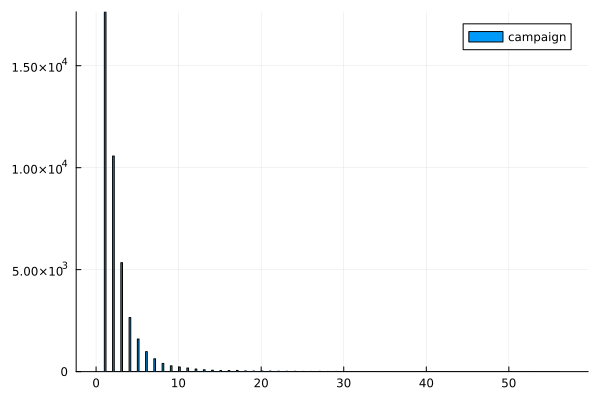

In [57]:
histogram(bank.campaign, label="campaign")

It is very skewed. We will cut it into several bins.

In [58]:
bank.campaign_cat = cut(bank.campaign, 1:4; labels=["1", "2", "3", "4+"], extend=true)

41188-element CategoricalArray{String,1,UInt32}:
 "1"
 "1"
 "1"
 "1"
 "1"
 "1"
 "1"
 "1"
 "1"
 "1"
 "1"
 "1"
 "1"
 ⋮
 "1"
 "4+"
 "2"
 "3"
 "2"
 "1"
 "1"
 "1"
 "1"
 "2"
 "1"
 "3"

In [59]:
levels(bank.campaign_cat)

4-element Vector{String}:
 "1"
 "2"
 "3"
 "4+"

In [60]:
proptable(bank.campaign_cat)

4-element Named Vector{Float64}
Dim1  │ 
──────┼─────────
1     │ 0.428329
2     │ 0.256628
3     │ 0.129674
4+    │  0.18537

In [61]:
glm(@formula(y_bin ~ age + day_of_week + campaign_cat), bank, Binomial())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, LogitLink}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y_bin ~ 1 + age + day_of_week + campaign_cat

Coefficients:
────────────────────────────────────────────────────────────────────────────────────
                        Coef.  Std. Error       z  Pr(>|z|)    Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────────────────
(Intercept)       -2.39969     0.0723434   -33.17    <1e-99  -2.54148     -2.2579
age                0.00912225  0.00145425    6.27    <1e-09   0.00627197   0.0119725
day_of_week: tue   0.16417     0.0502005     3.27    0.0011   0.0657788    0.262561
day_of_week: wed   0.162328    0.050238      3.23    0.0012   0.0638635    0.260793
day_of_week: thu   0.204475    0.0492072     4.16    <1e-04   0.10803      0.300919
day_of_week: fri   0.0941782   

Now let us investigate the `"age"` variable again.

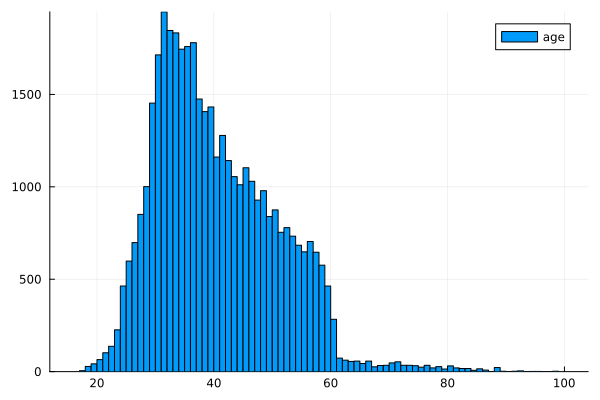

In [62]:
histogram(bank.age; label="age")

In [63]:
bank.age_cut = cut(bank.age, 10)

41188-element CategoricalArray{String,1,UInt32}:
 "Q10: [55.0, 98.0]"
 "Q10: [55.0, 98.0]"
 "Q5: [35.0, 38.0)"
 "Q6: [38.0, 41.0)"
 "Q10: [55.0, 98.0]"
 "Q8: [45.0, 49.0)"
 "Q10: [55.0, 98.0]"
 "Q7: [41.0, 45.0)"
 "Q1: [17.0, 28.0)"
 "Q1: [17.0, 28.0)"
 "Q7: [41.0, 45.0)"
 "Q1: [17.0, 28.0)"
 "Q2: [28.0, 31.0)"
 ⋮
 "Q6: [38.0, 41.0)"
 "Q10: [55.0, 98.0]"
 "Q10: [55.0, 98.0]"
 "Q10: [55.0, 98.0]"
 "Q5: [35.0, 38.0)"
 "Q5: [35.0, 38.0)"
 "Q2: [28.0, 31.0)"
 "Q10: [55.0, 98.0]"
 "Q8: [45.0, 49.0)"
 "Q10: [55.0, 98.0]"
 "Q7: [41.0, 45.0)"
 "Q10: [55.0, 98.0]"

In [64]:
y_by_age = combine(groupby(bank, :age_cut), proprow, :y_bin => mean => :mean_y_bin)

Row,age_cut,proprow,mean_y_bin
,Cat…,Float64,Float64
1,"Q1: [17.0, 28.0)",0.0780567,0.18196
2,"Q2: [28.0, 31.0)",0.101195,0.129319
3,"Q3: [31.0, 33.0)",0.0920899,0.106512
4,"Q4: [33.0, 35.0)",0.08687,0.110117
5,"Q5: [35.0, 38.0)",0.121734,0.0913442
6,"Q6: [38.0, 41.0)",0.0971157,0.08525
7,"Q7: [41.0, 45.0)",0.108915,0.0822559
8,"Q8: [45.0, 49.0)",0.0980868,0.0806931
9,"Q9: [49.0, 55.0)",0.113237,0.0915523


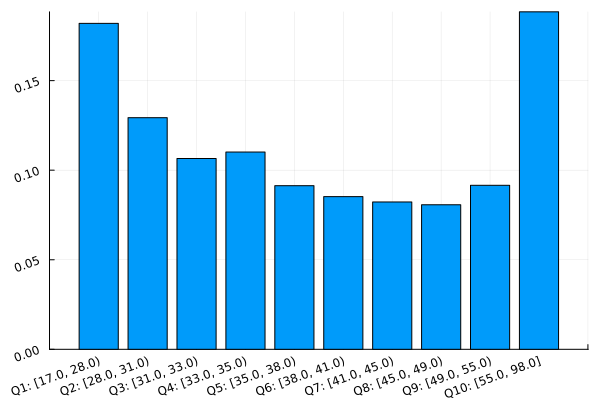

In [65]:
bar(y_by_age.age_cut, y_by_age.mean_y_bin; rotation=20, label=false)

It looks like our relationship is not linear. Let us add a quadratic term to the model.

In [66]:
glm(@formula(y_bin ~ age + age^2 + day_of_week + campaign_cat), bank, Binomial())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, LogitLink}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y_bin ~ 1 + age + :(age ^ 2) + day_of_week + campaign_cat

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────
                        Coef.  Std. Error       z  Pr(>|z|)    Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────────────
(Intercept)        1.90667     0.168144     11.34    <1e-29   1.57712      2.23623
age               -0.194612    0.00752238  -25.87    <1e-99  -0.209356    -0.179869
age ^ 2            0.00222718  8.16362e-5   27.28    <1e-99   0.00206718   0.00238719
day_of_week: tue   0.146174    0.0510021     2.87    0.0042   0.0462113    0.246136
day_of_week: wed   0.132466    0.0510235     2.60    0.0094   0.0324618    0.23247
day_of_week: t